## Airlines+Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import warnings
import itertools
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [3]:
Airline=pd.read_excel("Airlines+Data.xlsx")

In [4]:
Airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
Airline.set_index('Month', inplace=True)

In [6]:
Airline

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [7]:
Airline.duplicated().sum()

16

In [8]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


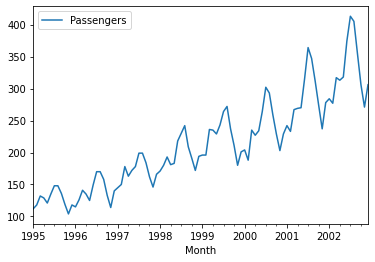

In [9]:
from matplotlib import pyplot
Airline.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

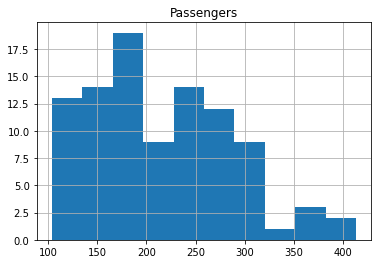

In [10]:
Airline.hist()

<AxesSubplot:ylabel='Density'>

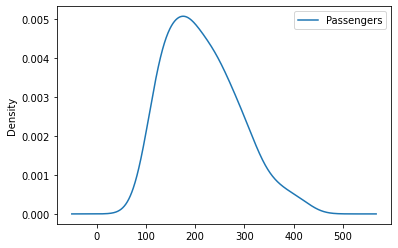

In [11]:
Airline.plot(kind='kde')


Box and Whisker Plots by Interval

In [12]:
Airline = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                    squeeze=True)
Airline

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [13]:
type(Airline)

pandas.core.series.Series

In [14]:
# Grouping by Year
groups = Airline.groupby(pd.Grouper(freq='A'))
groups

In [15]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<AxesSubplot:>

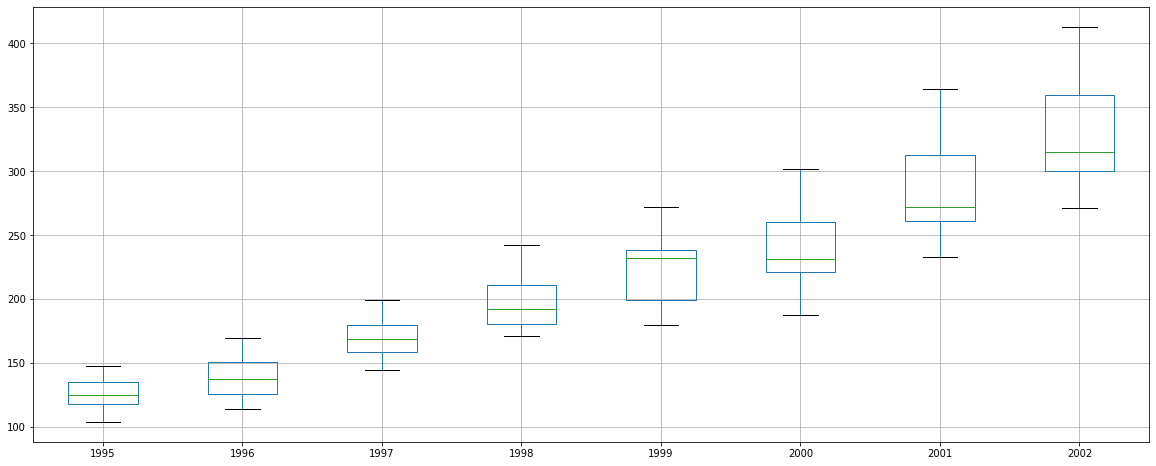

In [16]:
plt.figure(figsize = (20,8))
years.boxplot()

Lag plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

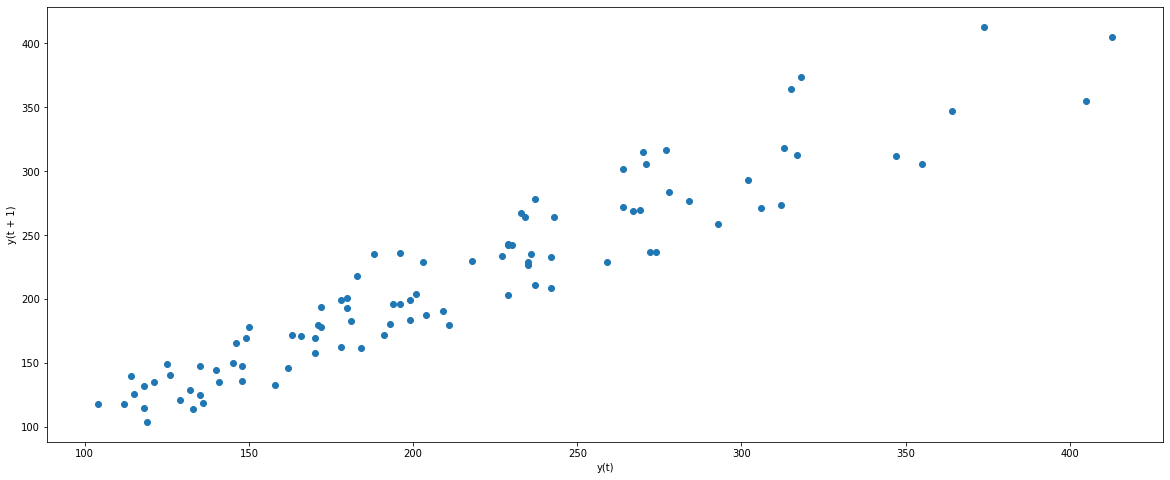

In [17]:
plt.figure(figsize = (20,8))
pd.plotting.lag_plot(Airline)

<Figure size 2880x720 with 0 Axes>

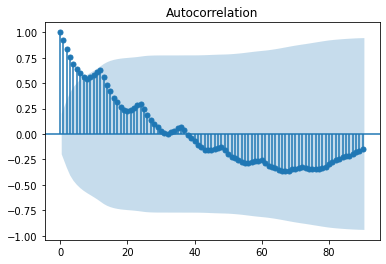

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (40,10))
plot_acf(Airline, lags=90)
plt.show()

Sampling and Basic Transformations

Upsampling Data

In [19]:
Airline = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                    squeeze=True)
Airline

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [20]:
Airline.shape

(96,)

In [21]:
upsampled = Airline.resample('D').mean()
upsampled.head(20)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
Freq: D, Name: Passengers, dtype: float64

In [22]:
upsampled.shape

(2892,)

Interpolate the Missing Value

In [23]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(20)

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
Freq: D, Name: Passengers, dtype: float64

<AxesSubplot:xlabel='Month'>

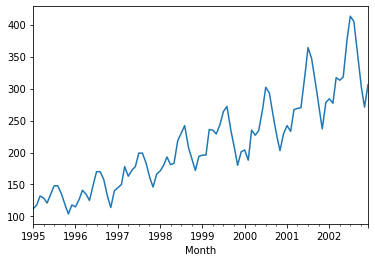

In [24]:
interpolated.plot()

<AxesSubplot:xlabel='Month'>

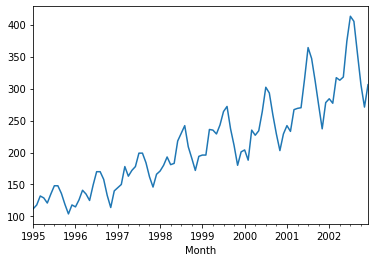

In [25]:
Airline.plot()

Downsampling data

In [26]:
resample = Airline.resample('Q')
quarterly_mean_sales = resample.mean()

<AxesSubplot:xlabel='Month'>

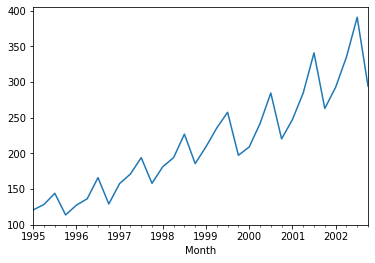

In [27]:
quarterly_mean_sales.plot()

Square root transform

In [28]:
dataframe = pd.DataFrame(np.sqrt(Airline.values), columns = ['Passengers'])
dataframe

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


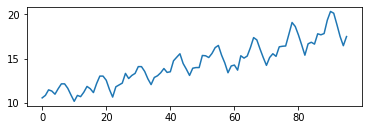

In [29]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

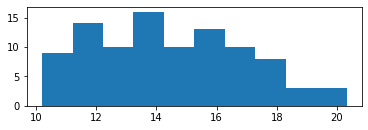

In [30]:
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

Log transform

In [31]:
dataframe = pd.DataFrame(np.log(Airline.values), columns = ['Passengers'])
dataframe

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


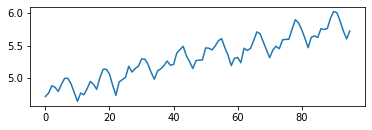

In [32]:
# Line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

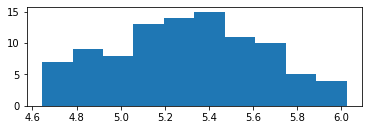

In [33]:
# Histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [34]:
quarterly_mean_sales.head()

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

Forecasting - Model Based Methods

In [35]:
Airline=pd.read_excel("Airlines+Data.xlsx")
Airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

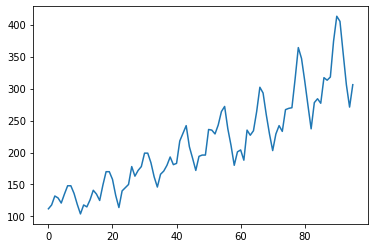

In [36]:
Airline['Passengers'].plot()

In [37]:
Airline["month"] = Airline['Month'].dt.strftime("%b") # month extraction
Airline["year"] = Airline['Month'].dt.strftime("%Y") # year extraction


In [38]:
Airline

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [39]:
heatmap_y_month = pd.pivot_table(data = Airline,
                                 values = "Passengers",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
heatmap_y_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='month', ylabel='year'>

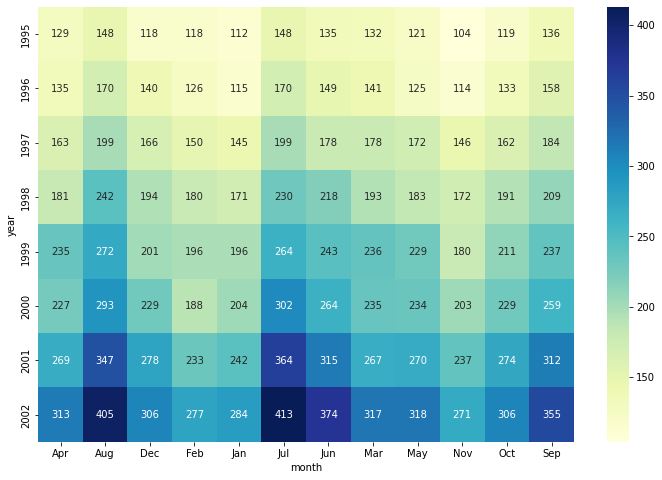

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_y_month,
            annot=True,
            fmt="g",
            cmap = 'YlGnBu') #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

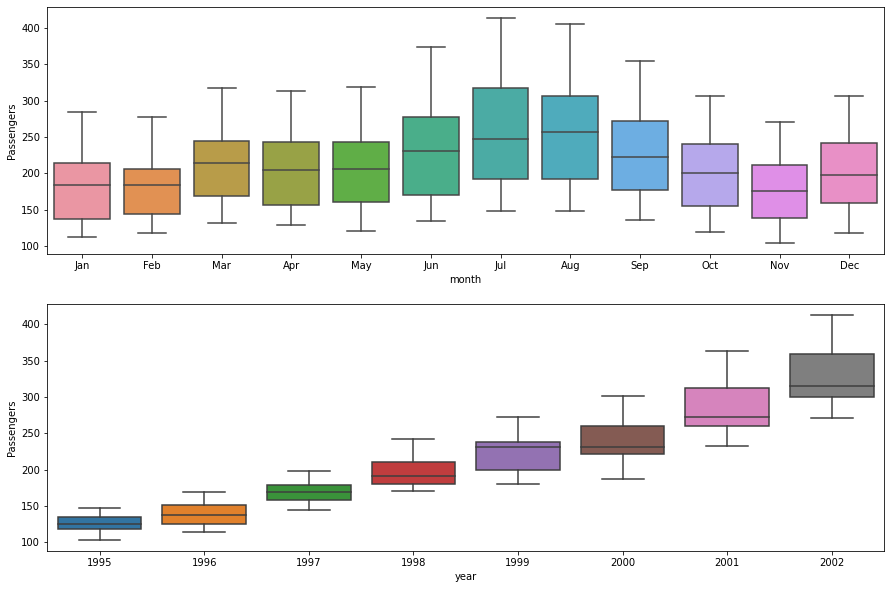

In [41]:
# Boxplot for ever
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Airline)

plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airline)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

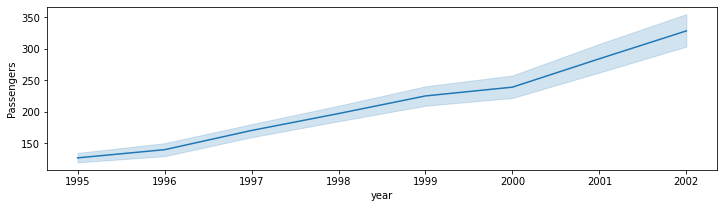

In [43]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airline)

Splitting data

In [45]:
Airline

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [46]:
Airline.shape

(96, 4)

In [47]:
# Complete the dataset
Airline['t']=np.arange(1,97)
Airline['t_square']=np.square(Airline.t)
Airline['log_Passengers']=np.log(Airline.Passengers)
Airline1=pd.get_dummies(Airline['month'])

In [48]:
Airline

,Month,Passengers,month,year,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [49]:
Airline1

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
Airline=pd.concat([Airline,Airline1],axis=1)
Airline

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
# For self understanding of forecasting values data split into multiples of 12
Train = Airline.head(84)
Test = Airline.tail(12)

In [52]:
Train

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,2001,80,6400,5.849325,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,Sep,2001,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,Oct,2001,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,Nov,2001,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
Test

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,2002-01-01,284,Jan,2002,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,2002,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,2002,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,2002,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,2002,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,Jun,2002,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,Jul,2002,91,8281,6.023448,0,0,0,0,0,1,0,0,0,0,0,0
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480278

In [55]:
#Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.05736110315654

In [56]:
#Quadratic 
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.05188897933164

In [57]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.8197848142182

In [58]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612095307

In [59]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708646

In [60]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

10.519172544323746

In [61]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

325.73121052134104

In [62]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


In [63]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Airline).fit()

In [64]:
pred_new  = pd.Series(model_full.predict(Airline))
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [65]:
Airline["forecasted_Passengers"] = pd.Series(np.exp(pred_new))



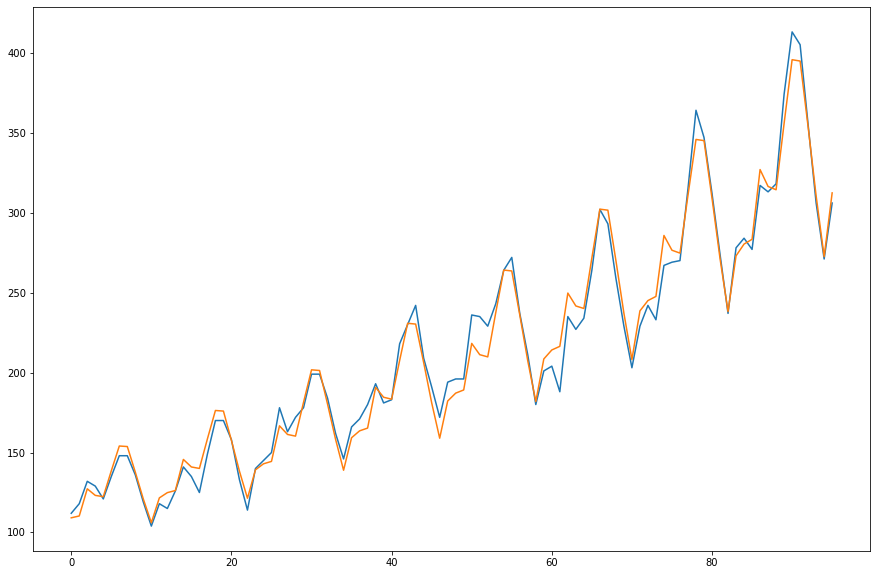

In [66]:
plt.figure(figsize=(15,10))
plt.plot(Airline[['Passengers','forecasted_Passengers']].reset_index(drop=True))

Splitting data

In [67]:
Airline=pd.read_excel("Airlines+Data.xlsx")
Train = Airline.head(84)
Test = Airline.tail(12)

In [68]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


In [69]:
Test

,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


Moving Average

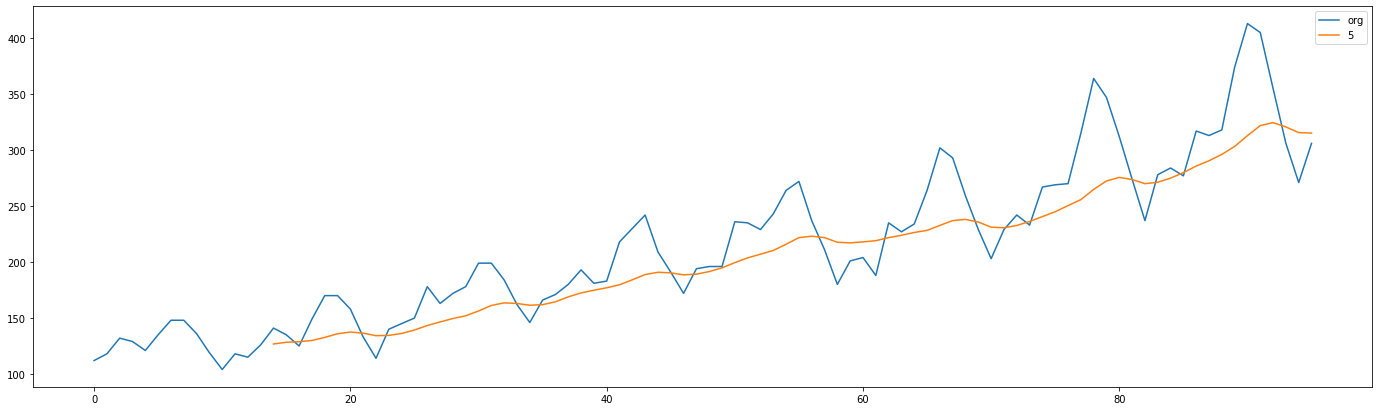

In [70]:
plt.figure(figsize=(24,7))
Airline['Passengers'].plot(label="org")
Airline["Passengers"].rolling(15).mean().plot(label=str(5))
plt.legend(loc='best')

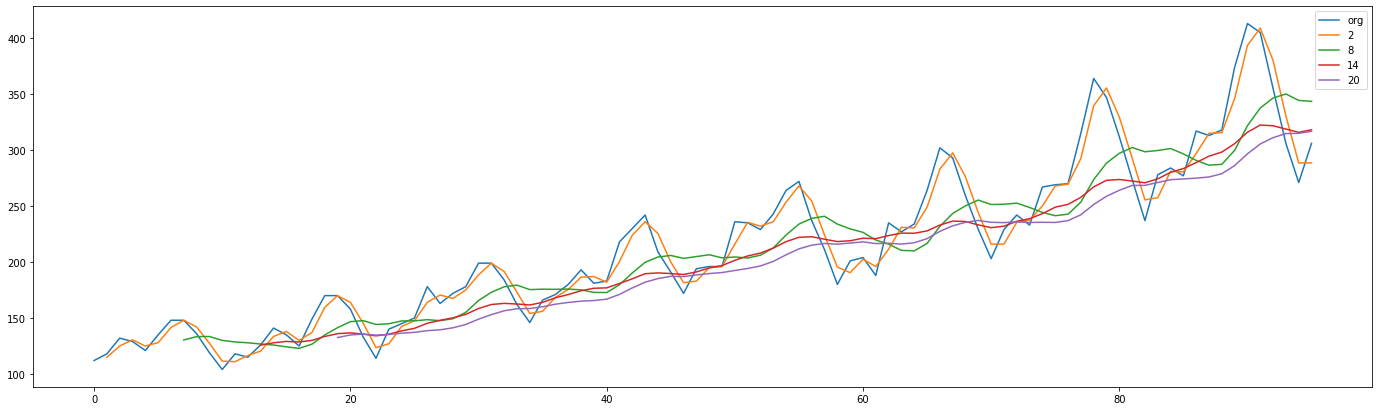

In [71]:
plt.figure(figsize=(24,7))
Airline['Passengers'].plot(label="org")
for i in range(2,24,6):
    Airline["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

Time Series Decomposition plot

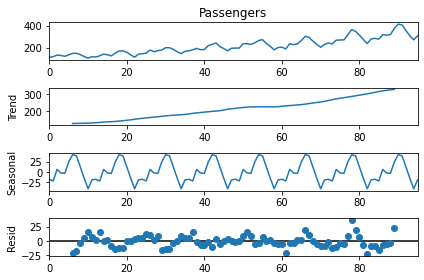

In [72]:
decompose_ts_add = seasonal_decompose(Airline['Passengers'], period = 12)
decompose_ts_add.plot()
plt.show()

ACF plots and PACF plots

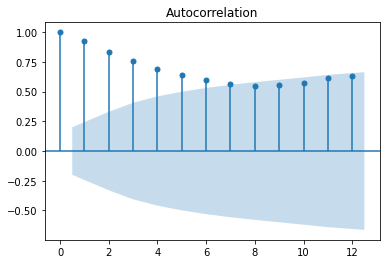

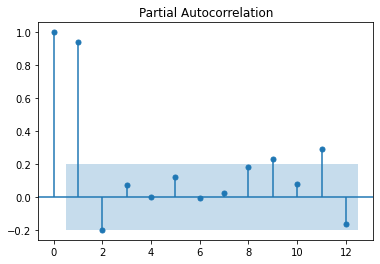

In [73]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Airline.Passengers,lags=12)
tsa_plots.plot_pacf(Airline.Passengers,lags=12)
plt.show()

Evaluation Metric MAPE

In [74]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

Simple Exponential Method

In [75]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


13.411274740513823

Holt method

In [76]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

<ipython-input-76-31e8e28b1106>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


23.53071965210063

Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend

In [77]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

5.499858437809377

Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend

In [78]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.8211184081344762

Final Model by Combining Train and Test

In [79]:
hwe_model_mul_add = ExponentialSmoothing(Airline["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [80]:
#Forecasting for next 12 time periods
hwe_model_mul_add.forecast(12)

96     312.899768
97     308.171843
98     355.533483
99     345.770653
100    345.697050
101    392.471899
102    436.502735
103    429.860677
104    380.174322
105    332.318746
106    290.626987
107    330.591994
dtype: float64

Forecasting using ARIMA model 

In [81]:
Airline=pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)
Airline

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [82]:
# separate out a validation dataset
split_point = len(Airline) - 12

dataset, validation = Airline[0:split_point], Airline[split_point:]

print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 84, Validation 12


Persistence/ Base model

In [84]:
# evaluate a persistence model
# load data
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-08-01    347
2001-09-01    312
2001-10-01    274
2001-11-01    237
2001-12-01    278
Name: 1, Length: 84, dtype: int64

In [85]:
# prepare data
X = train.values
X

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278])

In [86]:
X = X.astype('float32')
X

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278.], dtype=float32)

In [87]:
train_size = int(len(X) * 0.50)
train_size

42

In [88]:
train, test = X[0:train_size], X[train_size:]

In [89]:
train

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218.],
      dtype=float32)

In [90]:
test

array([230., 242., 209., 191., 172., 194., 196., 196., 236., 235., 229.,
       243., 264., 272., 237., 211., 180., 201., 204., 188., 235., 227.,
       234., 264., 302., 293., 259., 229., 203., 229., 242., 233., 267.,
       269., 270., 315., 364., 347., 312., 274., 237., 278.],
      dtype=float32)

In [91]:
# walk-forward validation
history = [x for x in train]
history

[112.0,
 118.0,
 132.0,
 129.0,
 121.0,
 135.0,
 148.0,
 148.0,
 136.0,
 119.0,
 104.0,
 118.0,
 115.0,
 126.0,
 141.0,
 135.0,
 125.0,
 149.0,
 170.0,
 170.0,
 158.0,
 133.0,
 114.0,
 140.0,
 145.0,
 150.0,
 178.0,
 163.0,
 172.0,
 178.0,
 199.0,
 199.0,
 184.0,
 162.0,
 146.0,
 166.0,
 171.0,
 180.0,
 193.0,
 181.0,
 183.0,
 218.0]

predictions

In [92]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>

In [93]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 26.029


ARIMA Hyperparameters

In [94]:
# grid search ARIMA parameters for a time series
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
    
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

Grid search for p,d,q values

In [95]:
# evaluate combinations of p, d and q values for an ARIMA model

def evaluate_models(dataset, p_values, d_values, q_values):
    
    dataset = dataset.astype('float32')
    
    best_score, best_cfg = float('inf'), None
    
    for p,d,q in itertools.product(p_values, d_values, q_values):
    #for p in p_values:
    #    for d in d_values:
    #        for q in q_values:
    
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE=%.3f' % (best_cfg, best_score))

In [96]:
# load dataset
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-08-01    347
2001-09-01    312
2001-10-01    274
2001-11-01    237
2001-12-01    278
Name: 1, Length: 84, dtype: int64

In [97]:
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

In [98]:
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=78.356
ARIMA(0, 0, 1) RMSE=44.791
ARIMA(0, 0, 2) RMSE=34.737
ARIMA(0, 0, 3) RMSE=29.139
ARIMA(0, 0, 4) RMSE=30.098
ARIMA(0, 1, 0) RMSE=26.029
ARIMA(0, 1, 1) RMSE=25.374
ARIMA(0, 1, 2) RMSE=26.051
ARIMA(0, 1, 3) RMSE=25.943
ARIMA(0, 1, 4) RMSE=24.470
ARIMA(0, 2, 0) RMSE=32.281
ARIMA(0, 2, 1) RMSE=26.206
ARIMA(0, 2, 2) RMSE=25.556
ARIMA(0, 2, 3) RMSE=27.087
ARIMA(0, 2, 4) RMSE=24.274
ARIMA(0, 3, 0) RMSE=49.456
ARIMA(0, 3, 1) RMSE=32.545
ARIMA(0, 3, 2) RMSE=26.721
ARIMA(0, 3, 3) RMSE=26.032
ARIMA(0, 3, 4) RMSE=26.630
ARIMA(0, 4, 0) RMSE=84.509
ARIMA(0, 4, 1) RMSE=49.870
ARIMA(0, 4, 2) RMSE=33.150
ARIMA(0, 4, 3) RMSE=27.914
ARIMA(0, 4, 4) RMSE=31.675
ARIMA(1, 0, 0) RMSE=26.447
ARIMA(1, 0, 1) RMSE=25.615
ARIMA(1, 0, 2) RMSE=26.125
ARIMA(1, 0, 3) RMSE=28.051
ARIMA(1, 0, 4) RMSE=25.579
ARIMA(1, 1, 0) RMSE=25.723
ARIMA(1, 1, 1) RMSE=25.457
ARIMA(1, 1, 2) RMSE=24.457
ARIMA(1, 1, 3) RMSE=24.800
ARIMA(1, 1, 4) RMSE=24.549
ARIMA(1, 2, 0) RMSE=31.529
ARIMA(1, 2, 1) RMSE=25.927
A

Build Model based on the Optimized Values

In [99]:
# save finalized model to file
# load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
train

,112
1995-01-01,
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
...,...
2001-08-01,347
2001-09-01,312
2001-10-01,274


In [100]:
# prepare Data
X = train.values
X = X.astype('float32')

In [101]:
# fit model
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 12)
forecast

array([285.42128941, 286.31463991, 301.74441056, 309.57699787,
       322.47914911, 325.55237062, 328.29735909, 322.59553123,
       316.87399419, 307.51957318, 301.28164357, 295.99002854])

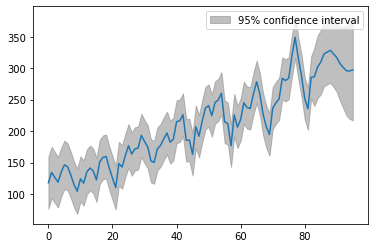

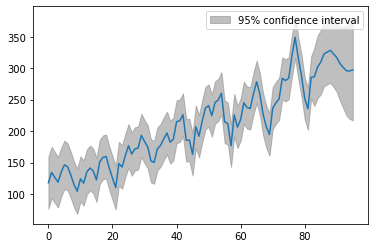

In [102]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)
#model_fit.plot_predict(1, 96)

In [103]:
#Error on the test data
val = pd.read_csv('validation.csv', header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

39.93597046104474

Combine train and test data and build Final model

In [104]:
# fit model
Airline=pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)

# prepare data
X = train.values
X = X.astype('float32')

In [105]:
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()

In [106]:
forecast=model_fit.forecast(steps=12)
forecast

array([285.42128941, 286.31463991, 301.74441056, 309.57699787,
       322.47914911, 325.55237062, 328.29735909, 322.59553123,
       316.87399419, 307.51957318, 301.28164357, 295.99002854])

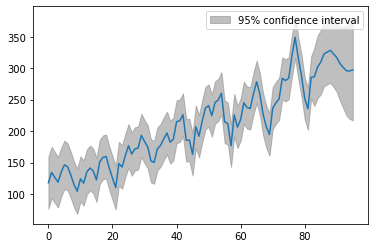

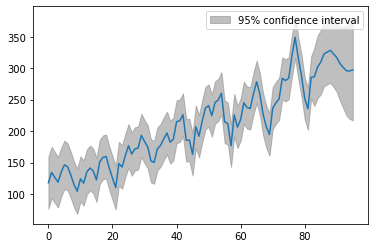

In [107]:
#model_fit.plot_predict(1,90)
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)

Comparing above Models the Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend gives minimum error i.e 2.82

## CocaCola_Sales_Rawdata

In [108]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [109]:
from google.colab import files
uploaded = files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [110]:
coca=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [111]:
coca.duplicated().sum()

0

In [112]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [113]:
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:>

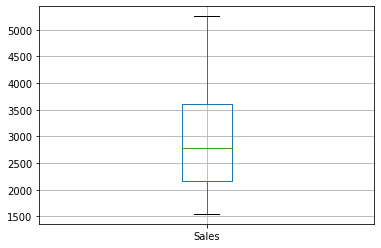

In [114]:
coca.boxplot()

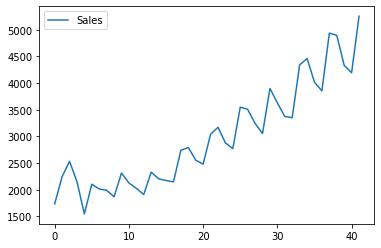

In [115]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
coca.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

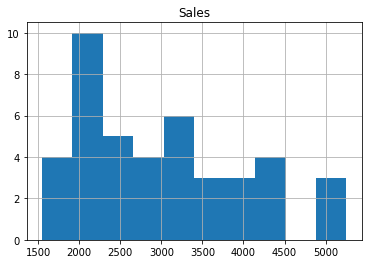

In [116]:
coca.hist()

<AxesSubplot:ylabel='Density'>

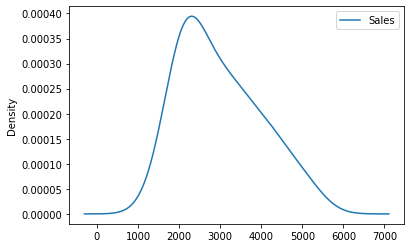

In [117]:
coca.plot(kind='kde')

In [118]:
quarter =['Q1','Q2','Q3','Q4']

In [119]:
p = coca["Quarter"][0]
p[0:2]
coca['quarter']= 0

for i in range(42):
    p = coca["Quarter"][i]
    coca['quarter'][i]= p[0:2]

coca

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [120]:
quarter_dummies = pd.DataFrame(pd.get_dummies(coca['quarter']))
quarter_dummies

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [121]:
coca1=pd.concat([coca,quarter_dummies],axis=1)
coca1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [122]:
coca1["t"] = np.arange(1,43)

In [123]:
coca1["t_squared"] = coca1["t"]*coca1["t"]
coca1["log_Sales"] = np.log(coca1["Sales"])
coca1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


Splitting the data

In [124]:
Train=coca1.head(30)
Test=coca1.tail(12)

In [125]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
30,Q3_93,3629.0,Q3,0,0,1,0,31,961,8.196712
31,Q4_93,3373.0,Q4,0,0,0,1,32,1024,8.123558
32,Q1_94,3352.0,Q1,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015


linear model

In [126]:
linear_model = smf.ols('Sales~t',data=Train).fit()                    
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

714.0144483281299

exponential model

In [126]:
exp = smf.ols('log_Sales~t',data=Train).fit()                        
pred_exp = pd.Series(exp.predict(pd.DataFrame(Test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

Quadratic model

In [127]:
quad = smf.ols('Sales~t+t_squared',data=Train).fit()                  
pred_quad = pd.Series(quad.predict(Test[["t","t_squared"]]))
rmse_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_quad))**2))
rmse_quad

646.2715428311304

Additive seasonality

In [128]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()              
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1778.0065467941367

Additive Seasonality Quadratic

In [129]:
add_sea_quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Train).fit()        
pred_add_sea_quad = pd.Series(add_sea_quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

586.0533067871008

Multiplicative Seasonality

In [130]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()     
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1828.9238912138117

Multiplicative Additive Seasonality

In [132]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()   
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

410.24970596082767

prediction

In [136]:
data = [['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'],['Q2_97', 'Q2']]
print(data)
forecast = pd.DataFrame(data, columns = ['Quarter', 'quarter'])
forecast

[['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'], ['Q2_97', 'Q2']]


,Quarter,quarter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


In [137]:
dummies = pd.DataFrame(pd.get_dummies(forecast['quarter']))         # Create dummies and T and T-Squared columns
forecast1 = pd.concat([forecast,dummies],axis = 1)
forecast1["t"] = np.arange(1,5)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
forecast1

,Quarter,quarter,Q1,Q2,Q3,Q4,t,t_squared
0,Q3_96,Q3,0,0,1,0,1,1
1,Q4_96,Q4,0,0,0,1,2,4
2,Q1_97,Q1,1,0,0,0,3,9
3,Q2_97,Q2,0,1,0,0,4,16


In [138]:
model_full = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data =coca1).fit()     
pred_new = pd.Series(model_full.predict(forecast1))  

In [139]:
pred_new

0    7.522993
1    7.442919
2    7.387558
3    7.628081
dtype: float64

In [140]:
forecast1["forecasted_sales"] = pd.Series(pred_new)

Final Prediction for next 4 Quarters

In [141]:
Fin_predict = forecast1.loc[:, ['Quarter', 'forecasted_sales']]           
Fin_predict

,Quarter,forecasted_sales
0,Q3_96,7.522993
1,Q4_96,7.442919
2,Q1_97,7.387558
3,Q2_97,7.628081
